### Edge detection

In [1]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

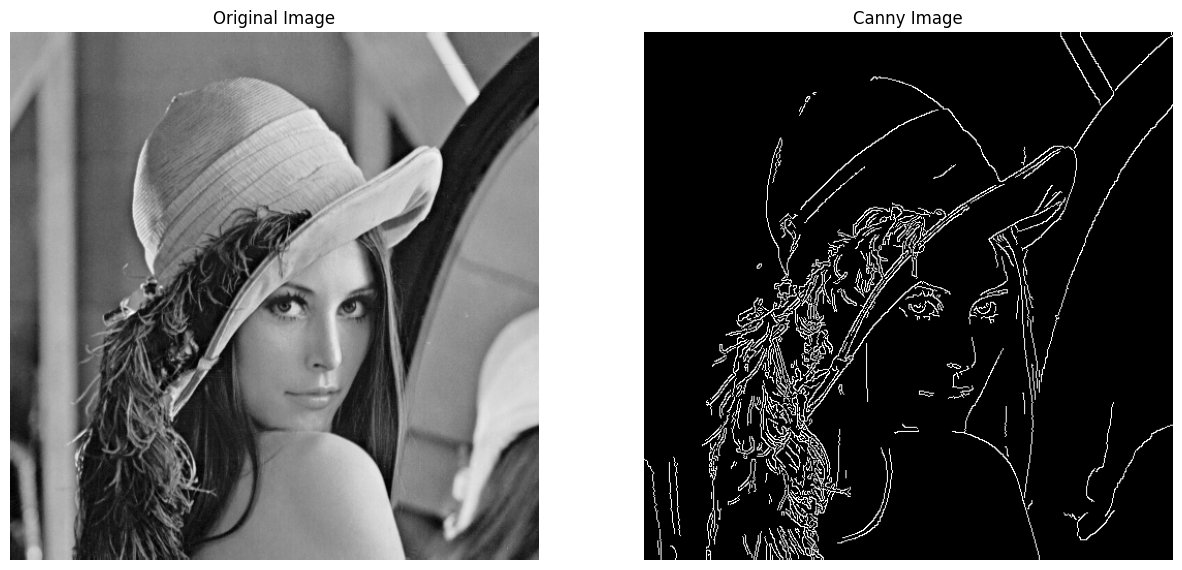

In [15]:
img = cv.imread("lenna.png" , cv.IMREAD_GRAYSCALE)

canny = cv.Canny(img, 100, 200)

#plot the original image and the canny image
fig , ax = plt.subplots(1 , 2 , figsize=(15 , 10))
ax[0].imshow(img , cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")
ax[1].imshow(canny , cmap="gray")
ax[1].set_title("Canny Image")
ax[1].axis("off")
plt.show()

### corner detection

In [35]:
img = cv.imread('chess.webp' , cv.IMREAD_COLOR)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst,None)
img[dst>0.01*dst.max()]=[0,0,255]

cv.imshow('dst',img)
cv.waitKey(0)
cv.destroyAllWindows()






# Harris Corner Detection

Harris corner detection is a popular algorithm used to identify corners in images for computer vision tasks. It is based on the idea that corners can be identified as points where the intensity of the image changes significantly in multiple directions. Below is an overview of the mathematical foundation behind Harris corner detection:

## 1. Image Intensity Gradient
The first step is to compute the gradients of the image intensity in both the $x$- and $y$-directions. These gradients are the partial derivatives of the image, and they measure the rate of change of pixel intensity:

- $ I_x = \frac{\partial I}{\partial x} $ (gradient along the x-axis)
- $ I_y = \frac{\partial I}{\partial y} $ (gradient along the y-axis)

These gradients are often computed using Sobel filters.

## 2. Second Moment Matrix (Structure Tensor)
The Harris corner detection uses a second-moment matrix (also called the auto-correlation matrix or structure tensor), which captures the intensity change in both directions. The matrix $M$ at a pixel is defined as:

$$
M = \begin{bmatrix}
\sum I_x^2 & \sum I_x I_y \\
\sum I_x I_y & \sum I_y^2
\end{bmatrix}
$$

This matrix is computed over a window of pixels (typically a small region) around each point. The terms in the matrix:

- $\sum I_x^2$: Sum of squares of gradients along the x-axis.
- $\sum I_y^2$: Sum of squares of gradients along the y-axis.
- $\sum I_x I_y$: Sum of the product of gradients along both axes.

## 3. Eigenvalue Analysis
The matrix $M$ describes how intensity varies in the neighborhood of a pixel. The eigenvalues $ \lambda_1 $ and $ \lambda_2 $ of this matrix tell us the nature of the local structure:

- $ \lambda_1 $ and $ \lambda_2 $ are large: the region contains a corner (significant variation in two directions).
- One eigenvalue is large, the other is small: the region contains an edge (significant variation in one direction).
- Both eigenvalues are small: the region is flat (little variation in any direction).

## 4. Corner Response Function
To avoid explicitly computing eigenvalues, the Harris corner detector defines a **corner response function** $R$ based on the determinant and trace of the matrix $M$:

$$
R = \text{det}(M) - a \, (\text{trace}(M))^2
$$

Where:
- $\text{det}(M) = \lambda_1 \lambda_2$ is the determinant of the matrix.
- $\text{trace}(M) = \lambda_1 + \lambda_2$ is the trace of the matrix.
- $a$ is a sensitivity parameter, typically between 0.04 and 0.06.

The value of $R$ is used to classify points:
- If $R$ is large, the point is a corner.
- If $R$ is negative, the point is likely on an edge.
- If $R$ is small, the point is a flat region.

## 5. Non-Maximum Suppression
After computing the corner response function $R$ for all pixels, a **non-maximum suppression** step is applied to ensure that only local maxima are retained as corner points. This reduces noise and selects the most prominent corners.

## Summary of Key Formulas

1. **Image gradient**:
   $$
   I_x = \frac{\partial I}{\partial x}, \quad I_y = \frac{\partial I}{\partial y}
   $$

2. **Structure tensor (second-moment matrix)**:
   $$
   M = \begin{bmatrix}
   \sum I_x^2 & \sum I_x I_y \\
   \sum I_x I_y & \sum I_y^2
   \end{bmatrix}
   $$

3. **Corner response function**:
   $$
   R = \text{det}(M) - a (\text{trace}(M))^2
   $$

This method is widely used due to its simplicity and effectiveness in detecting corners, which are key features in many computer vision applications.


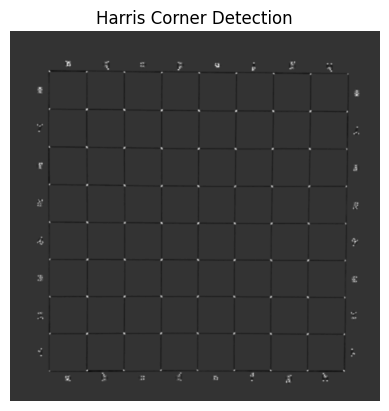

In [37]:
img = cv.imread('chess.webp' , cv.IMREAD_COLOR)

I = cv.cvtColor(img , cv.COLOR_BGR2GRAY)
I = np.float32(I)

sobel_h = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]] , dtype = np.float32)
sobel_v = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]] , dtype = np.float32)

Ix = cv.filter2D(I , -1 , sobel_v)
Iy = cv.filter2D(I , -1 , sobel_h)

ksize = 7
sigma = 1.5

m11 = cv.GaussianBlur(Ix**2 , (ksize,ksize) , sigma)
m12 = cv.GaussianBlur(Ix*Iy , (ksize,ksize) , sigma)
m21 = cv.GaussianBlur(Ix*Iy , (ksize,ksize) , sigma)
m22 = cv.GaussianBlur(Iy**2 , (ksize,ksize) , sigma)

det = m11*m22 - m12*m21
trace = m11 + m22

R = det - 0.04*(trace**2)

R = cv.normalize(R , None , 0 , 255 , cv.NORM_MINMAX , cv.CV_8U)

#plot the image
plt.imshow(R , cmap = 'gray')
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()



### blob detection

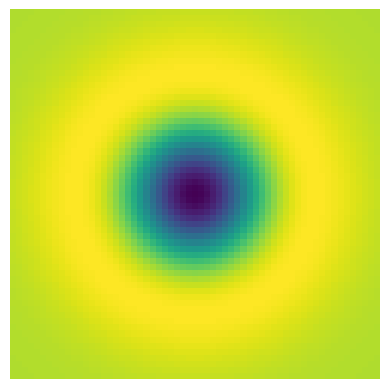

In [8]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 10
hw = 3 * sigma
X , Y =  np.meshgrid(np.arange(-hw, hw + 1 , 1), np.arange(-hw, hw + 1 , 1))
log = -1/(2*np.pi*sigma**4)*(1-((X**2+Y**2)/(2*sigma**2)))*np.exp(-(X**2+Y**2)/(2*sigma**2))

plt.imshow(log)
plt.axis('off')
plt.show()

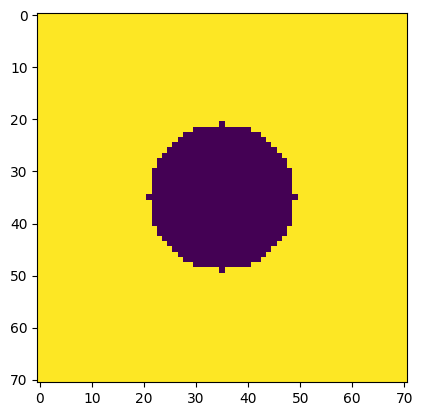

(29, 29, 0)

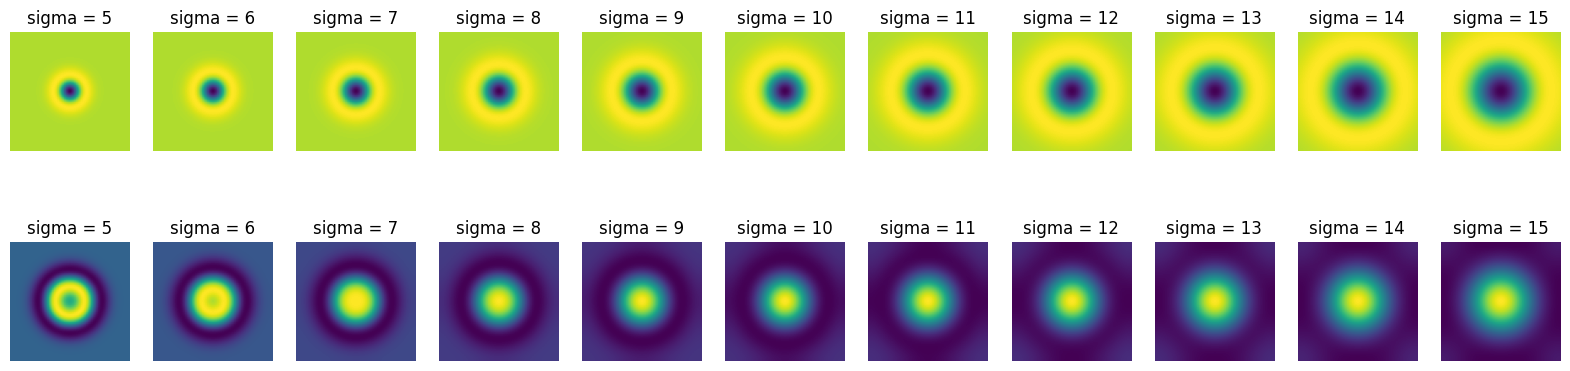

In [32]:
#generating the circle
w , h =71 ,  71
hw , hh  = w//2 , h//2


f = np.ones((h, w) , dtype=np.float32)*255
X , Y =  np.meshgrid(np.arange(-hh, hh + 1 , 1), np.arange(-hw, hw + 1 , 1))

r = w//5 
f += X**2 + Y**2 > r**2

plt.imshow(f )
plt.show()


import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

s = 11
fig , ax = plt.subplots(2 , s , figsize = (20 , 5))
scale_space = np.empty((h , w , s) , dtype=np.float32)
sigmas = np.arange(5 , 16 , 1)
for i,sigma in enumerate(sigmas):
    log_hw = 3*np.max(sigmas)
    X , Y =  np.meshgrid(np.arange(-hw, hw + 1 , 1), np.arange(-hw, hw + 1 , 1))
    log = -1/(2*np.pi*sigma**4)*(1-((X**2+Y**2)/(2*sigma**2)))*np.exp(-(X**2+Y**2)/(2*sigma**2))
    f_log = cv.filter2D(f , -1 , log)
    scale_space[:,:,i] = f_log
    ax[0 , i].imshow(log)
    ax[0 , i].set_title(f'sigma = {sigma}')
    ax[0 , i].axis('off')
    ax[1 , i].imshow(f_log)
    ax[1 , i].set_title(f'sigma = {sigma}')
    ax[1 , i].axis('off')
indices = np.unravel_index(np.argmax(scale_space , axis = None) , scale_space.shape)
indices    


# The Mathematical Background of the Code

This code is essentially implementing a scale-space representation and applying a Laplacian of Gaussian (LoG) filter across different scales (controlled by the standard deviation sigma). Here’s a breakdown of the mathematical operations involved:

## 1. Circle Generation

**Meshgrid (X, Y):** This part creates two 2D arrays X and Y, which correspond to the Cartesian coordinates of the pixels centered around the middle of the image. The range is $[-hh, hh]$ and $[-hw, hw]$, corresponding to the horizontal and vertical half-width of the image.

**Equation for a Circle:** The equation $X^2 + Y^2 > r^2$ is derived from the equation of a circle in Cartesian coordinates:

$$
x^2 + y^2 = r^2
$$

This condition is used to set the pixels outside the circle to a value greater than $r^2$, creating a circular shape.

**Result:** This operation creates a binary image (in $f$), where the pixels inside the circle are 255 and those outside are 255 + 1.

## 2. Laplacian of Gaussian (LoG) Filter

### The LoG Kernel

The Laplacian of Gaussian (LoG) operator combines two operations:

**Gaussian Smoothing:** The Gaussian function:

$$
G(x, y, \sigma) = \frac{1}{2\pi \sigma^2} \exp\left(-\frac{x^2 + y^2}{2\sigma^2}\right)
$$

smooths an image, reducing noise and making the image less sensitive to small-scale details.

**Laplacian (Second Derivative):** The Laplacian operator measures the second spatial derivatives of the image:

$$
\nabla^2 f(x,y) = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}
$$

It detects regions where the intensity changes sharply, such as edges.

The Laplacian of Gaussian (LoG) combines these into a single kernel:

$$
\text{LoG}(x,y,\sigma) = \nabla^2 G(x,y,\sigma) = -\frac{1}{2\pi \sigma^4} \left(1 - \frac{x^2 + y^2}{2\sigma^2}\right) \exp\left(-\frac{x^2 + y^2}{2\sigma^2}\right)
$$

This kernel detects edges while smoothing the image.

### Applying LoG to the Image

**Convolution:** The `filter2D` function applies the LoG filter to the image $f$. This operation convolves the image with the LoG kernel, resulting in an image that highlights areas of rapid intensity change (edges).

## 3. Scale-Space Representation

Here, `sigmas` is an array of different values of the Gaussian standard deviation $\sigma$. For each value of $\sigma$, a different LoG filter is applied. This is essential in scale-space theory, where different scales (levels of sigma) allow you to detect edges at different levels of detail.

The `scale_space` is a 3D matrix where each slice along the third axis corresponds to the filtered image at a different scale (i.e., for a different value of $\sigma$).

## 4. Finding the Maximum Response in the Scale Space

**`np.argmax`:** This function finds the index of the maximum value in the entire 3D `scale_space`. This value corresponds to the point in the image where the response of the LoG filter (across all scales) is strongest.

**`np.unravel_index`:** This converts the flattened index from `np.argmax` back into 3D coordinates, giving the location in the image $(x, y)$ and the scale $(\sigma)$ at which the strongest edge response occurs.

## Summary of Mathematical Concepts

- **Circle Generation:** A binary image is created with a circular region based on the equation 
$$
x^2 + y^2 = r^2.
$$

- **Laplacian of Gaussian (LoG):** The LoG operator is applied to the image, which combines Gaussian smoothing and edge detection through the Laplacian of the intensity function.

- **Scale Space:** The image is filtered with LoG filters of different scales (sigma values). This produces a scale-space representation of the image, useful for detecting features at multiple scales.

- **Finding Maximum Response:** The algorithm searches for the maximum response across all scales, identifying the most significant features in the image (edges) and the scale at which they occur.

This mathematical framework is part of multi-scale edge detection commonly used in image processing to identify edges and objects of different sizes.
